In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('NYSE.xlsx')
df.tail()

,Date,RETURN,RATE
3266,1900-03-23,8316.74,-0.693058
3267,1900-03-23,8332.12,0.184757
3268,1900-03-23,8306.51,-0.307838
3269,1900-03-23,8444.37,1.646040
3270,1900-03-23,8429.52,-0.176012


In [3]:
from statsmodels.stats.diagnostic import acorr_ljungbox 
acorr_ljungbox(df.RATE[1:], lags=[16], return_df=True)

,lb_stat,lb_pvalue
16,74.598482,1.541063e-09


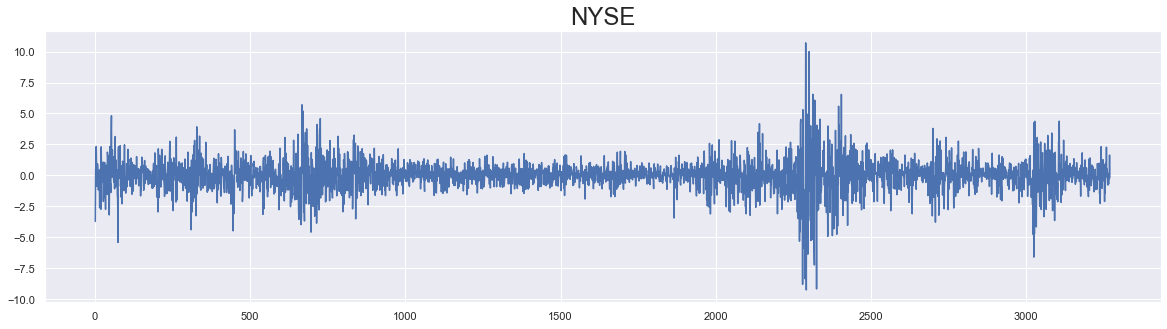

In [4]:
df.RATE.plot(figsize=(20,5))
plt.title("NYSE", size = 24)
plt.show()

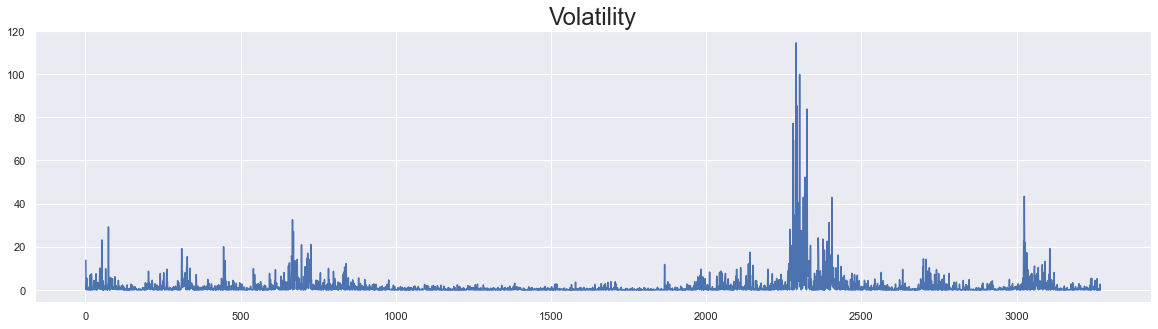

In [5]:
df['sq_rates'] = df.RATE.mul(df.RATE)
df.sq_rates.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

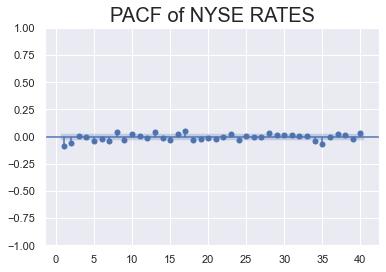

In [6]:
sgt.plot_pacf(df.RATE[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of NYSE RATES", size = 20)
plt.show()

In [7]:
# from arch import arch_model
# model building blocks: mean, variance, distribution
!pip install arch
from arch.univariate import ConstantMean,GARCH,EGARCH
from arch.univariate import Normal,StudentsT,GeneralizedError
from arch import arch_model
